# Roc Analysis

In [1]:
import pandas as pd,numpy as np
df_returns=pd.read_pickle('returns')
df_RSI=pd.read_pickle('RSI')
df_MACD=pd.read_pickle('MACD')
df_CCI=pd.read_pickle('CCI')
df_CMO=pd.read_pickle('CMO')
df_ATR=pd.read_pickle('ATR')
df_BOP=pd.read_pickle('BOP')
df_MFI=pd.read_pickle('MFI')
df_ADOSC=pd.read_pickle('ADOSC')
df_BETA=pd.read_pickle('BETA')
col_filter=df_returns.dropna(axis=1).columns
index_adj=df_returns.index[61:]
df_RSI_filter=df_RSI[col_filter].loc[index_adj]
df_MACD_filter=df_MACD[col_filter].loc[index_adj]
df_CCI_filter=df_CCI[col_filter].loc[index_adj]
df_CMO_filter=df_CMO[col_filter].loc[index_adj]
df_ATR_filter=df_ATR[col_filter].loc[index_adj]
df_BOP_filter=df_BOP[col_filter].loc[index_adj]
df_MFI_filter=df_MFI[col_filter].loc[index_adj]
df_ADOSC_filter=df_ADOSC[col_filter].loc[index_adj]
df_BETA_filter=df_BETA[col_filter].loc[index_adj]
df_returns_filter=df_returns[col_filter].loc[index_adj]

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    LogisticRegression(),
    MLPClassifier(),
    KNeighborsClassifier(),
    LinearSVC(multi_class='crammer_singer'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

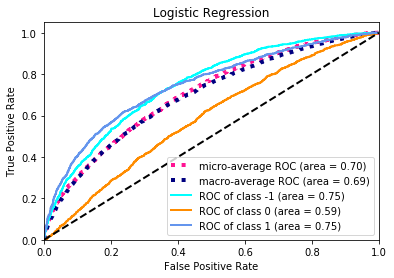

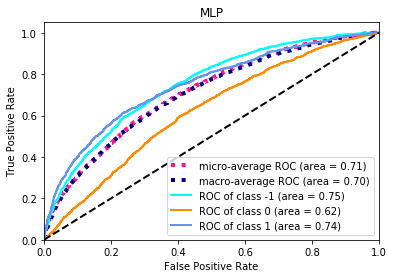

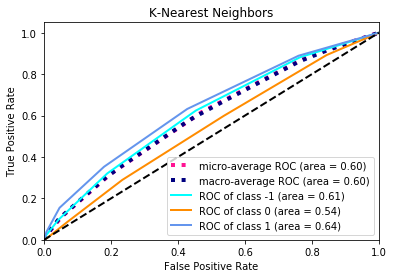

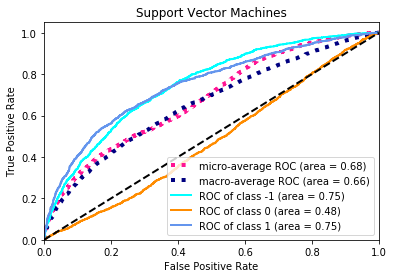

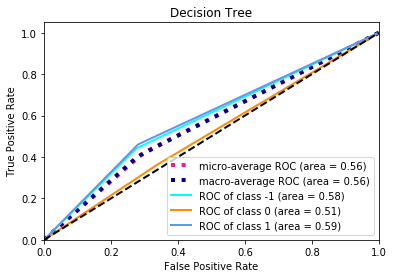

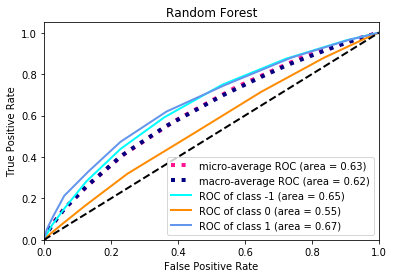

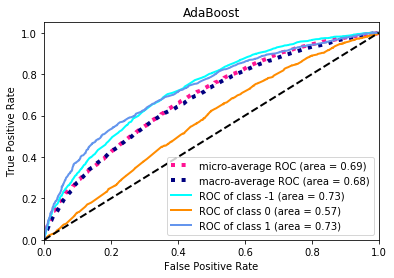

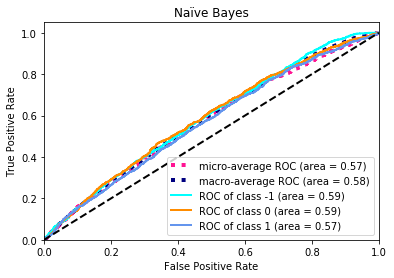

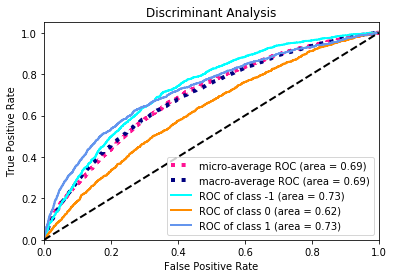

In [7]:
ROC_name=['Logistic Regression','MLP','K-Nearest Neighbors','Support Vector Machines','Decision Tree','Random Forest','AdaBoost','Naïve Bayes','Discriminant Analysis']
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
y = label_binarize(Y, classes=[-1, 0, 1])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)
ROC_title=[]
for clf_num in range(len(classifiers)):
    classifier = OneVsRestClassifier(classifiers[clf_num])
    if hasattr(classifier, "decision_function"):
        y_score = classifier.fit(X_train, y_train).decision_function(X_test)
    else:
        try:
            y_score = classifier.fit(X_train, y_train).predict_proba(X_test)[:,:,0].T
        except:
            y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    # Plot all ROC curves
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    lw = 2
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC of class {0} (area = {1:0.2f})'
                 ''.format(i-1, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(ROC_name[clf_num])
    plt.legend(loc="lower right")
    plt.show()